# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Moh. Aldi Rohmatulloh]
- **Email:** [mc525d5y0147@student.devacademy.id]
- **ID Dicoding:** [MC525D5Y0147]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren Temperatur wilayah Dingling dalam periode tahun 2013 hingga 2017?
- Bagaimana tren Tekanan pada Atmosfer pada wilayah Dingling dalam periode tahun 2013 hingga 2017?

## Import Semua Packages/Library yang Digunakan

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [118]:
dingling_df = pd.read_csv("Data/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


**Insight:**
- Dari proses Gathering data yang dilakukan diketahui bahwa dataset tersebut merupakan sebuah dataset yabg berisi data kualitas udara pada stasiun Dingling yang pada tanggal 1 Naret 2013 hingga 28 Februari 2017. 
- Data dalam dataset tersebut memiliki total 35063 row dengan 18 kolom yaitu terdiri atas, year, month, day, hour, PM2.5, pm10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station.
- Dataset tersebut memberikan beberapa informasi penting yang dapat dimanfaatkan untuk tahap analisis, informasi tersebut berupa informasi waktu, kualiatas udara, Faktor Cuaca, Faktor angin, dan Stasiun.

### Assessing Data

### Memeriksa tipe data dari setiap kolom pada dingling_df menggunakan method info()

In [119]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Memeriksa missing values pada dingling_df menggunakan kombinasi method isna() dan method sum()

In [120]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

 ### Memeriksa Duplikasi Data yang pada dingling_df menggunakan method duplicated()

In [121]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())

Jumlah duplikasi:  0


### Memeriksa parameter statistik dari kolom numerik yang terdapat pada dingling_df menggunakan method describe()

In [122]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**
- Dalam proses pertama dalam tahap Accessing data diketahui bahwa tidak ada masalah untuk tipedata setiap kolom yang ada pada dataset dingling_df, akan tetapi terdapat terlalu banyak missing values pada beberapa kolom utama.
- Setelah dilakukan pemeriksaan missing values dapat diketahui jumlah missing values pada beberapa kolom utama yaitu antara lain sebagai berikut :
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
- Setelah melakukan pemeriksaan duplikasi data daoat diketahui vahwa dakam dataset dingling_df tidak terjadi duplikasi data, hal tersebut dibuktikan dengan hasil jumlah duplikasi yang bernilai 0.
- Selanjutnya dalam pemeriksaan paraameter statistik tidak terdapat keanehan pada setiap parameter statistik pada dataset dingling_df.

### Cleaning Data

### Membuat kolom baru datetime 

In [123]:
dingling_df["datetime"] = pd.to_datetime(dingling_df[["year", "month", "day", "hour"]])
dingling_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
4516,4517,2013,9,5,4,4.0,4.0,1.0,NaN,400.0,62.0,17.4,1005.7,15.0,0.0,WNW,1.3,Dingling,2013-09-05 04:00:00
18954,18955,2015,4,29,18,123.0,154.0,11.0,26.0,1400.0,231.0,25.7,1000.3,14.5,0.0,SE,2.5,Dingling,2015-04-29 18:00:00
15231,15232,2014,11,25,15,126.0,138.0,40.0,77.0,1500.0,25.0,6.5,1024.0,-2.4,0.0,ESE,1.7,Dingling,2014-11-25 15:00:00
6718,6719,2013,12,5,22,49.0,74.0,24.0,29.0,1300.0,24.0,1.2,1013.3,-11.3,0.0,ENE,0.6,Dingling,2013-12-05 22:00:00
21996,21997,2015,9,3,12,15.0,23.0,2.0,6.0,400.0,107.0,30.0,1005.6,14.5,0.0,S,2.2,Dingling,2015-09-03 12:00:00


### Menampilkan missing values pada kolom PM2.5

In [124]:
dingling_df[dingling_df["PM2.5"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
752,753,2013,4,1,8,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1005.9,-3.2,0.0,NW,7.2,Dingling,2013-04-01 08:00:00
753,754,2013,4,1,9,NaN,NaN,NaN,NaN,NaN,NaN,10.6,1007.0,-3.5,0.0,NNW,4.5,Dingling,2013-04-01 09:00:00
754,755,2013,4,1,10,NaN,NaN,NaN,NaN,NaN,NaN,13.2,1007.8,-3.6,0.0,NNW,4.5,Dingling,2013-04-01 10:00:00
755,756,2013,4,1,11,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1007.7,-4.9,0.0,NNE,4.0,Dingling,2013-04-01 11:00:00
756,757,2013,4,1,12,NaN,NaN,NaN,NaN,NaN,NaN,15.3,1007.9,-5.7,0.0,NE,5.0,Dingling,2013-04-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,34864,2017,2,20,15,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling,2017-02-20 15:00:00
34864,34865,2017,2,20,16,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling,2017-02-20 16:00:00
34866,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling,2017-02-20 18:00:00
34883,34884,2017,2,21,11,NaN,NaN,26.0,68.0,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling,2017-02-21 11:00:00


### Melakukan interpolasi pada kolom PM2.5

In [125]:
dingling_df["PM2.5"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\3529878565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["PM2.5"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Menampilkan Missing Values Pada Kolom PM10

In [126]:
dingling_df[dingling_df["PM10"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
10,11,2013,3,1,10,8.000000,NaN,3.0,NaN,200.0,83.0,2.0,1025.1,-21.3,0.0,N,2.2,Dingling,2013-03-01 10:00:00
12,13,2013,3,1,12,6.000000,NaN,3.0,NaN,200.0,85.0,4.8,1023.8,-19.7,0.0,N,3.0,Dingling,2013-03-01 12:00:00
77,78,2013,3,4,5,5.000000,NaN,3.0,NaN,200.0,87.0,5.4,1015.4,-12.1,0.0,NW,4.7,Dingling,2013-03-04 05:00:00
226,227,2013,3,10,10,7.000000,NaN,10.0,7.0,300.0,91.0,10.6,1018.4,-16.8,0.0,S,2.5,Dingling,2013-03-10 10:00:00
227,228,2013,3,10,11,12.000000,NaN,9.0,6.0,300.0,91.0,10.4,1018.1,-16.9,0.0,SE,2.0,Dingling,2013-03-10 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,34864,2017,2,20,15,12.666667,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling,2017-02-20 15:00:00
34864,34865,2017,2,20,16,12.333333,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling,2017-02-20 16:00:00
34866,34867,2017,2,20,18,15.500000,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling,2017-02-20 18:00:00
34883,34884,2017,2,21,11,63.500000,NaN,26.0,68.0,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling,2017-02-21 11:00:00


### Melakukan Interpolasi Untuk Mengatasi Missing Values Pada Kolom PM10

In [127]:
dingling_df["PM10"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\2149465918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["PM10"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Memeriksa Missing Values Pada Kolom SO2

In [128]:
dingling_df[dingling_dingling_df["SO2"].isna()]

NameError: name 'dingling_dingling_df' is not defined

### Melakukan Interpolasi Untuk Mengatasi Missing Values Pada Kolom SO2

In [ ]:
dingling_df["SO2"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\1983335480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["SO2"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


Memeriksa Missing Values pada Kolm NO2

In [ ]:
dingling_df[dingling_df["NO2"].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.000000,4.0,3.000000,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.000000,7.0,3.000000,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
3,4,6.000000,6.0,3.000000,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.000000,5.0,3.000000,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
10,11,8.000000,5.0,3.000000,NaN,200.0,83.0,2.0,1025.1,-21.3,0.0,N,2.2,Dingling,2013-03-01 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,34864,12.666667,24.0,4.666667,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling,2017-02-20 15:00:00
34864,34865,12.333333,22.0,4.333333,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling,2017-02-20 16:00:00
34866,34867,15.500000,33.0,4.500000,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling,2017-02-20 18:00:00
34885,34886,73.500000,73.5,15.333333,NaN,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Dingling,2017-02-21 13:00:00


Melakukan Interpolasi Untuk Mengatasi Missing Values Pada Kolom NO2 

In [ ]:
dingling_df["NO2"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\2100768421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["NO2"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,2.000000,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,2.000000,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Memeriksa Missing Values pada Kolom CO

In [ ]:
dingling_df[dingling_df["CO"].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
51,52,57.0,57.0,20.000000,67.0000,NaN,45.0,-4.0,1014.1,-13.4,0.0,NE,0.7,Dingling,2013-03-03 03:00:00
147,148,91.0,85.0,32.000000,46.0000,NaN,52.0,1.4,1003.6,-4.3,0.0,SW,1.0,Dingling,2013-03-07 03:00:00
178,179,122.0,175.0,31.701600,50.0932,NaN,75.0,17.3,997.3,-3.5,0.0,SE,1.4,Dingling,2013-03-08 10:00:00
243,244,75.0,83.0,18.000000,34.0000,NaN,100.0,-1.4,1014.1,-10.8,0.0,N,0.9,Dingling,2013-03-11 03:00:00
252,253,113.0,153.0,58.000000,68.0000,NaN,100.0,8.3,1010.4,-9.2,0.0,ESE,0.9,Dingling,2013-03-11 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34866,34867,15.5,33.0,4.500000,9.5000,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling,2017-02-20 18:00:00
34883,34884,63.5,85.5,26.000000,68.0000,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling,2017-02-21 11:00:00
34884,34885,62.0,62.0,20.666667,53.0000,NaN,NaN,0.0,1022.2,-15.5,0.0,ESE,1.6,Dingling,2017-02-21 12:00:00
34885,34886,73.5,73.5,15.333333,65.5000,NaN,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Dingling,2017-02-21 13:00:00


### Melakukan Interpolasi Untuk Mengatasi Missing Values pada Kolom CO

In [ ]:
dingling_df["CO"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\2622810132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["CO"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,2.000000,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,2.000000,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Memeriksa Missing Values pada Kolom O3

In [ ]:
dingling_df[dingling_df["O3"].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
435,436,40.000000,20.0,4.000000,28.0,700.000000,NaN,-0.5,1003.0,-2.2,0.0,SE,2.1,Dingling,2013-03-19 03:00:00
531,532,56.000000,71.0,12.000000,64.0,1100.000000,NaN,0.7,1005.5,-4.0,0.0,ESE,3.4,Dingling,2013-03-23 03:00:00
627,628,225.000000,221.0,29.000000,66.0,1700.000000,NaN,3.2,998.6,-0.8,0.0,NE,0.0,Dingling,2013-03-27 03:00:00
723,724,118.000000,104.0,14.000000,61.0,850.000000,NaN,3.9,1013.2,0.4,0.0,ESE,3.1,Dingling,2013-03-31 03:00:00
750,751,229.000000,235.0,25.000000,46.0,1690.909091,NaN,5.3,1005.3,-0.5,0.0,WNW,2.7,Dingling,2013-04-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34864,34865,12.333333,22.0,4.333333,6.0,300.000000,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling,2017-02-20 16:00:00
34866,34867,15.500000,33.0,4.500000,9.5,350.000000,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling,2017-02-20 18:00:00
34884,34885,62.000000,62.0,20.666667,53.0,1750.000000,NaN,0.0,1022.2,-15.5,0.0,ESE,1.6,Dingling,2017-02-21 12:00:00
34885,34886,73.500000,73.5,15.333333,65.5,1675.000000,NaN,-1.0,1021.5,-9.4,0.0,SW,1.7,Dingling,2017-02-21 13:00:00


### Melakukan Interpolasi Untuk Mengatasi Missing Values pada Kolom O3

In [ ]:
dingling_df["O3"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\549266016.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["O3"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,2.000000,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,2.000000,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Memeriksa Missing Values pada Kolom TEMP

In [ ]:
dingling_df[dingling_df["TEMP"].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-01-27 20:00:00
16813,16814,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-01-30 13:00:00
16829,16830,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-01-31 05:00:00
16873,16874,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-02 01:00:00
16883,16884,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-02 11:00:00
16930,16931,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-04 10:00:00
16933,16934,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-04 13:00:00
17007,17008,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-07 15:00:00
17030,17031,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-08 14:00:00
17052,17053,87.0,87.0,82.0,53.0,1600.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-09 12:00:00


### Melakukan Interpolasi Untuk Mengatasi Missing Values Kolom TEMP

In [ ]:
dingling_df["TEMP"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\2228374313.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["TEMP"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,2.000000,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,2.000000,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Memeriksa Missing Values pada Kolom PRES

In [ ]:
dingling_df[dingling_df["PRES"].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,39.0,43.0,28.0,34.0,1100.0,23.0,-3.000000,NaN,NaN,NaN,NaN,NaN,Dingling,2015-01-27 20:00:00
16813,16814,15.0,19.0,19.0,5.0,400.0,68.0,1.500000,NaN,NaN,NaN,NaN,NaN,Dingling,2015-01-30 13:00:00
16829,16830,5.0,11.0,32.0,8.0,400.0,60.0,-6.000000,NaN,NaN,NaN,NaN,NaN,Dingling,2015-01-31 05:00:00
16873,16874,60.0,60.0,30.0,39.0,2600.0,9.0,-5.000000,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-02 01:00:00
16883,16884,138.0,138.0,52.0,73.0,2200.0,14.0,-0.500000,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-02 11:00:00
16930,16931,8.0,8.0,13.0,5.0,200.0,69.0,0.500000,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-04 10:00:00
16933,16934,13.0,16.0,14.0,3.0,300.0,68.0,3.500000,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-04 13:00:00
17007,17008,3.0,24.0,2.0,2.0,200.0,88.0,3.500000,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-07 15:00:00
17030,17031,4.0,5.0,7.0,2.0,200.0,80.0,2.500000,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-08 14:00:00
17052,17053,87.0,87.0,82.0,53.0,1600.0,27.0,1.333333,NaN,NaN,NaN,NaN,NaN,Dingling,2015-02-09 12:00:00


### Melakukan Interpolasi Untuk Mengatasi Missing Values pada Kolom PRES

In [ ]:
dingling_df["PRES"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\1113654450.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["PRES"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,2.000000,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,2.000000,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Memeriksa MIssing Values pada Kolom DEWP

In [ ]:
dingling_df[dingling_df["DEWP"].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,39.0,43.0,28.0,34.0,1100.0,23.0,-3.000000,1024.500000,NaN,NaN,NaN,NaN,Dingling,2015-01-27 20:00:00
16813,16814,15.0,19.0,19.0,5.0,400.0,68.0,1.500000,1026.500000,NaN,NaN,NaN,NaN,Dingling,2015-01-30 13:00:00
16829,16830,5.0,11.0,32.0,8.0,400.0,60.0,-6.000000,1028.500000,NaN,NaN,NaN,NaN,Dingling,2015-01-31 05:00:00
16873,16874,60.0,60.0,30.0,39.0,2600.0,9.0,-5.000000,1024.000000,NaN,NaN,NaN,NaN,Dingling,2015-02-02 01:00:00
16883,16884,138.0,138.0,52.0,73.0,2200.0,14.0,-0.500000,1022.000000,NaN,NaN,NaN,NaN,Dingling,2015-02-02 11:00:00
16930,16931,8.0,8.0,13.0,5.0,200.0,69.0,0.500000,1023.000000,NaN,NaN,NaN,NaN,Dingling,2015-02-04 10:00:00
16933,16934,13.0,16.0,14.0,3.0,300.0,68.0,3.500000,1021.500000,NaN,NaN,NaN,NaN,Dingling,2015-02-04 13:00:00
17007,17008,3.0,24.0,2.0,2.0,200.0,88.0,3.500000,1021.000000,NaN,NaN,NaN,NaN,Dingling,2015-02-07 15:00:00
17030,17031,4.0,5.0,7.0,2.0,200.0,80.0,2.500000,1024.500000,NaN,NaN,NaN,NaN,Dingling,2015-02-08 14:00:00
17052,17053,87.0,87.0,82.0,53.0,1600.0,27.0,1.333333,1019.000000,NaN,NaN,NaN,NaN,Dingling,2015-02-09 12:00:00


### Melakukan Interpolasi Untuk Mengatasi Missing Values pada Kolom DEWP

In [ ]:
dingling_df["DEWP"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\2928104771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["DEWP"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,2.000000,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,2.000000,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Memeriksa Missing Values pada Kolom WSPM

In [ ]:
dingling_df[dingling_df["WSPM"].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
16748,16749,39.0,43.0,28.0,34.0,1100.0,23.0,-3.000000,1024.500000,-20.800000,NaN,NaN,NaN,Dingling,2015-01-27 20:00:00
16813,16814,15.0,19.0,19.0,5.0,400.0,68.0,1.500000,1026.500000,-21.350000,NaN,NaN,NaN,Dingling,2015-01-30 13:00:00
16829,16830,5.0,11.0,32.0,8.0,400.0,60.0,-6.000000,1028.500000,-23.600000,NaN,NaN,NaN,Dingling,2015-01-31 05:00:00
16873,16874,60.0,60.0,30.0,39.0,2600.0,9.0,-5.000000,1024.000000,-19.600000,NaN,NaN,NaN,Dingling,2015-02-02 01:00:00
16883,16884,138.0,138.0,52.0,73.0,2200.0,14.0,-0.500000,1022.000000,-16.550000,NaN,NaN,NaN,Dingling,2015-02-02 11:00:00
16930,16931,8.0,8.0,13.0,5.0,200.0,69.0,0.500000,1023.000000,-17.350000,NaN,NaN,NaN,Dingling,2015-02-04 10:00:00
16933,16934,13.0,16.0,14.0,3.0,300.0,68.0,3.500000,1021.500000,-17.450000,NaN,NaN,NaN,Dingling,2015-02-04 13:00:00
17007,17008,3.0,24.0,2.0,2.0,200.0,88.0,3.500000,1021.000000,-24.850000,NaN,NaN,NaN,Dingling,2015-02-07 15:00:00
17030,17031,4.0,5.0,7.0,2.0,200.0,80.0,2.500000,1024.500000,-27.300000,NaN,NaN,NaN,Dingling,2015-02-08 14:00:00
17052,17053,87.0,87.0,82.0,53.0,1600.0,27.0,1.333333,1019.000000,-21.866667,NaN,NaN,NaN,Dingling,2015-02-09 12:00:00


### Melakukan interpolasi Untuk Mengatasi Missing Values pada Kolom WSPM 

In [ ]:
dingling_df["WSPM"].interpolate(method='linear', limit_direction='backward', inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\157820046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["WSPM"].interpolate(method='linear', limit_direction='backward', inplace=True)


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,2.000000,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,2.000000,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Memeriksa Missing Values pada Kolom wd

In [ ]:
dingling_df[dingling_df["wd"].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
5107,5108,224.0,173.0,6.0,50.0,1200.0,21.0000,17.90,1010.5,15.7,0.0,NaN,0.0,Dingling,2013-09-29 19:00:00
5110,5111,141.0,91.0,4.0,41.0,1200.0,7.0000,17.90,1011.0,15.5,0.0,NaN,0.0,Dingling,2013-09-29 22:00:00
5111,5112,131.0,92.0,4.0,16.0,1200.0,22.0000,17.90,1010.8,15.3,0.0,NaN,0.0,Dingling,2013-09-29 23:00:00
6389,6390,34.0,64.0,22.0,44.0,800.0,9.8532,-1.60,1017.3,-6.7,0.0,NaN,0.0,Dingling,2013-11-22 05:00:00
6411,6412,98.0,111.0,31.0,103.0,1500.0,3.0000,0.40,1012.1,-5.8,0.0,NaN,0.0,Dingling,2013-11-23 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34296,34297,98.0,116.0,23.0,42.0,1100.0,54.0000,-0.95,1015.5,-15.4,0.0,NaN,0.3,Dingling,2017-01-28 00:00:00
34447,34448,70.0,78.0,28.0,52.0,1800.0,17.0000,-5.50,1016.1,-17.9,0.0,NaN,0.2,Dingling,2017-02-03 07:00:00
34519,34520,9.0,9.0,2.0,2.0,200.0,83.0000,-3.50,1022.0,-14.6,0.0,NaN,0.4,Dingling,2017-02-06 07:00:00
34538,34539,33.0,33.0,9.0,26.0,900.0,35.0000,-2.20,1022.8,-16.3,0.0,NaN,0.1,Dingling,2017-02-07 02:00:00


### Menghitung total value pada kolom wd 

In [ ]:
dingling_df["wd"].value_counts()

wd
NNW    4776
NW     3838
N      3777
WNW    2877
ESE    2786
E      2427
NNE    1919
SSE    1853
SE     1823
NE     1721
S      1700
W      1412
ENE    1305
SSW    1126
SW      880
WSW     704
Name: count, dtype: int64

### Mengisi Missing values pada kolom wd dengan NNW

In [ ]:
dingling_df["wd"].fillna(value="NNW", inplace=True)
dingling_df

C:\Users\SKRT\AppData\Local\Temp\ipykernel_6436\1176264509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df["wd"].fillna(value="NNW", inplace=True)


,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,3.0,2.000000,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01 00:00:00
1,2,7.0,7.0,3.0,2.000000,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01 01:00:00
2,3,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01 02:00:00
3,4,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01 03:00:00
4,5,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,11.0,11.0,2.0,2.000000,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28 19:00:00
35060,35061,13.0,13.0,2.0,2.000000,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28 20:00:00
35061,35062,9.0,14.0,2.0,2.000000,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28 21:00:00
35062,35063,10.0,12.0,2.0,2.000000,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28 22:00:00


### Memeriksa Ulang Missing Values

In [ ]:
dingling_df.isna().sum()

No           0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN        51
wd           0
WSPM         0
station      0
datetime     0
dtype: int64

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Data dingling_df

### Melihat Rangkuman Parameter Statistik dingling_df

In [ ]:
dingling_df.describe(include="all")

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35013.000000,35064,35064.000000,35064,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Dingling,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064,NaN
mean,17532.500000,66.845557,84.113713,11.797849,27.303589,925.111838,70.530792,13.671605,1007.771151,1.486924,0.060366,NaN,1.854871,NaN,2015-03-01 11:30:00
min,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.300000,0.000000,NaN,1.000000,NaN,2014-03-01 05:45:00
50%,17532.500000,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN,2015-03-01 11:30:00
75%,26298.250000,94.000000,118.000000,15.000000,37.176157,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN,2016-02-29 17:15:00
max,35064.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,NaN,10.000000,NaN,2017-02-28 23:00:00


### Melihat Parameter Statistik Temperatur Cuaca dan Tekanan Atmosfer pada setiap tahun

In [ ]:
dingling_df.groupby(by="datetime").agg({
    "No": "nunique",
    "TEMP": ["max", "min", "mean", "std"],
    "PRES": ["max", "min", "mean", "std"]
})

No  TEMP                    PRES                    
                    nunique   max   min  mean std     max     min    mean std
datetime                                                                     
2013-03-01 00:00:00       1  -2.3  -2.3  -2.3 NaN  1020.8  1020.8  1020.8 NaN
2013-03-01 01:00:00       1  -2.5  -2.5  -2.5 NaN  1021.3  1021.3  1021.3 NaN
2013-03-01 02:00:00       1  -3.0  -3.0  -3.0 NaN  1021.3  1021.3  1021.3 NaN
2013-03-01 03:00:00       1  -3.6  -3.6  -3.6 NaN  1021.8  1021.8  1021.8 NaN
2013-03-01 04:00:00       1  -3.5  -3.5  -3.5 NaN  1022.3  1022.3  1022.3 NaN
...                     ...   ...   ...   ...  ..     ...     ...     ...  ..
2017-02-28 19:00:00       1  11.7  11.7  11.7 NaN  1008.9  1008.9  1008.9 NaN
2017-02-28 20:00:00       1  10.9  10.9  10.9 NaN  1009.0  1009.0  1009.0 NaN
2017-02-28 21:00:00       1   9.5   9.5   9.5 NaN  1009.4  1009.4  1009.4 NaN
2017-02-28 22:00:00       1   7.8   7.8   7.8 NaN  1009.6  1009.6  1009.6 NaN
2017-02-28 23:00:00       1   7.0   7.0   7.0 NaN  1009.4  1009.4  1009.4 NaN

[35064 rows x 9 columns]

### Melihat rata rata temperatur cuaca dan tekanan atmosfer setiap tahun

In [ ]:
dingling_df.groupby(by="datetime").agg({
    "PRES": "mean",
    "TEMP": "mean",
}).sort_values(by="datetime", ascending=True)

,PRES,TEMP
datetime,,
2013-03-01 00:00:00,1020.8,-2.3
2013-03-01 01:00:00,1021.3,-2.5
2013-03-01 02:00:00,1021.3,-3.0
2013-03-01 03:00:00,1021.8,-3.6
2013-03-01 04:00:00,1022.3,-3.5
...,...,...
2017-02-28 19:00:00,1008.9,11.7
2017-02-28 20:00:00,1009.0,10.9
2017-02-28 21:00:00,1009.4,9.5


### Menghitung korelasi antara tekanan udara (PRES) dan temperatur (TEMP)


In [ ]:
correlation = dingling_df[['PRES', 'TEMP']].corr()
print("Korelasi antara Tekanan Udara dan Suhu:")
print(correlation)

Korelasi antara Tekanan Udara dan Suhu:
          PRES      TEMP
PRES  1.000000 -0.837857
TEMP -0.837857  1.000000


### Menyimpan data dalam format csv

In [ ]:
dingling_df.to_csv("Data/main_data.csv", index=False)

**Insight:**
- Rata- Rata Temperature diwilayah Stasiun Dingling Sangat Bervariasi, dimana mencapai suhu rendah dimalam hari yang ditandai dengan nilai negatif dan suhu akan meningkat disiang hari ditandai dengan suhu yang memiliki nilai positif.
- Seperti yang terjadi pada tanggal 1 Maret 2013, suhu yang awalnya -2.3°C pada pukul 00.00 terus menurun hingga mencapai -3.6°C pada pukul 03.00.
-Hal ini membuktikan bahwa suhu semakin dingin ketika dimalam hari.
- Contoh lain yang terjadi pada tanggal 28 Februari 2017, suhu lebih tinggi dengan nilai 11.7°C pada pukul 19.00 yang kemudian menurun hingga mencapi suhu 7.0°C pada pukul 23.00

## Visualization & Explanatory Analysis

### Pertanyaan 1: - Bagaimana tren Temperatur wilayah Dingling dalam periode tahun 2013 hingga 2017?

In [ ]:
dingling_df.set_index("datetime", inplace=True)

In [ ]:
dingling_df.sample(5)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2015-07-17 18:00:00,20851,51.0,59.0,8.0,17.0,500.0,103.0,26.9,996.8,18.2,0.0,SE,1.2,Dingling
2015-06-10 01:00:00,19946,62.0,63.0,5.0,17.0,1000.0,108.0,20.8,993.6,17.6,0.0,SSW,0.8,Dingling
2016-01-27 22:00:00,25511,93.0,105.0,36.0,87.0,1800.0,2.0,-4.3,1018.7,-17.2,0.0,NNW,1.7,Dingling
2014-01-25 12:00:00,7933,8.0,33.0,15.0,4.0,200.0,69.0,7.9,1017.7,-21.9,0.0,WNW,3.2,Dingling
2016-08-23 11:00:00,30516,77.0,86.0,3.0,21.0,800.0,84.0,27.5,998.7,22.0,0.0,E,1.9,Dingling


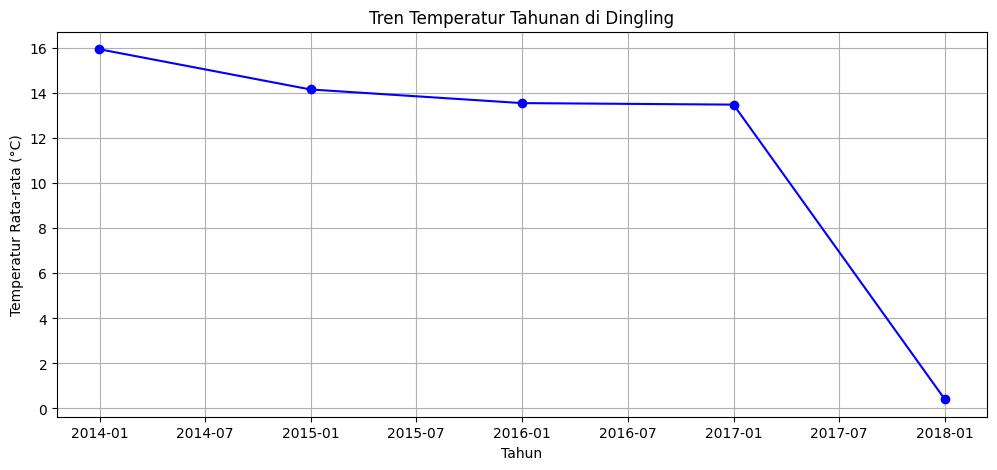

In [ ]:
temp_years = dingling_df.resample("YE").mean(numeric_only=True)

plt.figure(figsize=(12, 5))
plt.plot(temp_years.index, temp_years["TEMP"], marker="o", linestyle="-", color="b")

plt.xlabel("Tahun")
plt.ylabel("Temperatur Rata-rata (°C)")
plt.title("Tren Temperatur Tahunan di Dingling")
plt.grid()
plt.show()

plt.show()


### Pertanyaan 2: - Bagaimana tren Tekanan pada Atmosfer pada wilayah Dingling dalam periode tahun 2013 hingga 2017?

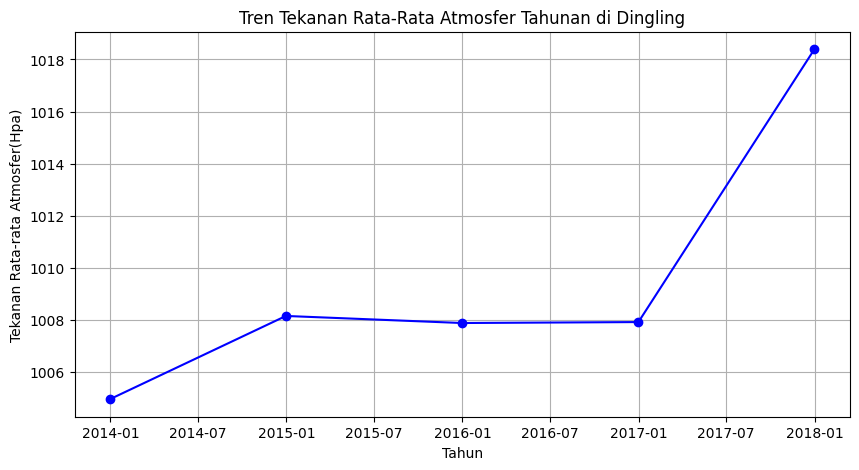

In [ ]:
temp_years = dingling_df.resample("YE").mean(numeric_only=True)

plt.figure(figsize=(10, 5))
plt.plot(temp_years.index, temp_years["PRES"], marker="o", linestyle="-", color="b")

plt.xlabel("Tahun")
plt.ylabel("Tekanan Rata-rata Atmosfer(Hpa)")
plt.title("Tren Tekanan Rata-Rata Atmosfer Tahunan di Dingling")
plt.grid()
plt.show()

plt.show()

**Insight:**
- Temperatur cuaca pada wilayah Dingling cenderung menurun dari tahun 2013 hingga 2017. Pada tahun 2015 hingga 2017 menunjukkan tempertaure yang relatif stabil meskipun terjadi sedikit penurunan. Namun terjadi penururnan tajam pada tahun 2017, dimana suhu menurun sangat drastis mendekati 0°C.
- Tekanan udara pada Stasiun Dingling mengalami peningkatan dari tahun 2013 hingga 2017. Pada awal tahun 2015 hingga awal tahun 2017 tekanan udara cenderung stabil. Peningkatan terbesar terjadi pada awal hingga akhir tahun 2017 
- Penurunan Temperatur cuaca dan Tekanan udara yang meningkat sepanjang tahun 2017 bisa menjadi indikasi bahwa terjadi musim dingin yang sangat ekstrem atau perubahan pola pada atmosfer.

## Analisis Lanjutan (Opsional)

KeyError: 'datetime'

## Conclusion

- Perubahan temperature suhu dan tekanan udara pada wilayah dingling bersifat dinamis, dengan tren suhu yang menurun dan tekanan udara yang meningkat. 
- Dengan pola korelasi yang negatif menunjukkan bahwa tekanan udara berpengaruh pada temperature suhu, hal ini ditunjukkan dengan semakin tinggi tekanan udara mengakibatkan suhu menjadi lebih rendah.
- Terjadi perubahan cuaca yang ekstrem pada periode tahun 2017 dimana temperature suhu menurun hingga 0°C dan tekanan udara yang meningkat secara drastis